In [12]:
from nixtla import NixtlaClient
import pandas as pd
import baostock as bs
from utils import get_index_components, get_csindex_components, get_history_k
import warnings
warnings.filterwarnings('ignore')



In [13]:
df_market = get_history_k(['sh.000001'],'2010-01-01','2024-12-17')

login success!
logout success!


In [3]:
nixtla_client = NixtlaClient(
    api_key = "nixak-yvNo62IdSYfyQU6LlkRnvP5jOjvfCwllKDfObxsC5HFugWNIKZ7ZOngtFjqqqeq27zNrokb8L2L5o4Bs"
)
nixtla_client.validate_api_key()


True

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [35]:
df_market['date_shadow'] = pd.date_range(start='2000-01-01', periods=df_market.shape[0], freq='D')
df_market.tail(12)

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pct_chg,pe_ttm,ps_ttm,pcf_ncf_ttm,pb_mrq,is_st,date_shadow
3621,2024-12-02,sh.000001,3328.4820,3369.3032,3323.0091,3363.9823,3326.4557,66847776200,7.095095e+11,3,1.450809,1,1.128126,0.0,0.0,0.0,0.0,0.0,2009-11-30
3622,2024-12-03,sh.000001,3366.2853,3386.6176,3348.3742,3378.8063,3363.9823,66303013900,6.839826e+11,3,1.438971,1,0.440668,0.0,0.0,0.0,0.0,0.0,2009-12-01
3623,2024-12-04,sh.000001,3376.5715,3388.0241,3352.9434,3364.6498,3378.8063,62102886200,6.534675e+11,3,1.347811,1,-0.418979,0.0,0.0,0.0,0.0,0.0,2009-12-02
3624,2024-12-05,sh.000001,3353.0573,3377.0550,3353.0573,3368.8553,3364.6498,54388574600,5.655511e+11,3,1.180278,1,0.124991,0.0,0.0,0.0,0.0,0.0,2009-12-03
3625,2024-12-06,sh.000001,3370.9405,3418.2608,3364.2061,3404.0764,3368.8553,69818657200,6.859811e+11,3,1.515101,1,1.045492,0.0,0.0,0.0,0.0,0.0,2009-12-04
3626,2024-12-09,sh.000001,3402.6288,3426.6451,3385.9588,3402.5343,3404.0764,69490520500,6.494432e+11,3,1.507818,1,-0.045302,0.0,0.0,0.0,0.0,0.0,2009-12-05
3627,2024-12-10,sh.000001,3490.2892,3494.8669,3417.7654,3422.6607,3402.5343,79466803400,8.604840e+11,3,1.724249,1,0.591512,0.0,0.0,0.0,0.0,0.0,2009-12-06
3628,2024-12-11,sh.000001,3416.0874,3437.8103,3416.0874,3432.4902,3422.6607,68154461000,6.929296e+11,3,1.478797,1,0.287189,0.0,0.0,0.0,0.0,0.0,2009-12-07
3629,2024-12-12,sh.000001,3432.2786,3464.1162,3425.9755,3461.4998,3432.4902,70009668900,7.341690e+11,3,1.519014,1,0.845147,0.0,0.0,0.0,0.0,0.0,2009-12-08
3630,2024-12-13,sh.000001,3442.9259,3442.9259,3390.7537,3391.8782,3461.4998,77746414400,8.507149e+11,3,1.686815,1,-2.011313,0.0,0.0,0.0,0.0,0.0,2009-12-09


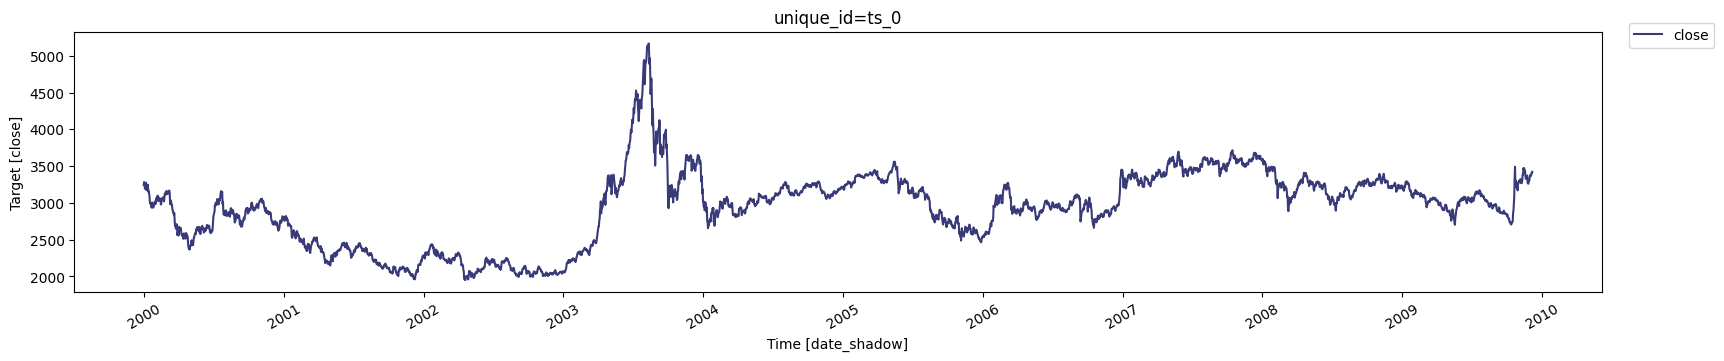

In [31]:
nixtla_client.plot(df_market, time_col='date_shadow', target_col='close')


In [36]:
timegpt_fcst_df = nixtla_client.forecast(df=df_market.iloc[:-10], h=10, freq='D', time_col='date_shadow', target_col='close')
timegpt_fcst_df


,date_shadow,TimeGPT
0,2009-12-02,3359.5080
1,2009-12-03,3348.8547
2,2009-12-04,3348.4387
3,2009-12-05,3349.8047
4,2009-12-06,3356.0542
5,2009-12-07,3355.1895
6,2009-12-08,3345.6313
7,2009-12-09,3337.7250
8,2009-12-10,3334.7815
9,2009-12-11,3346.0125


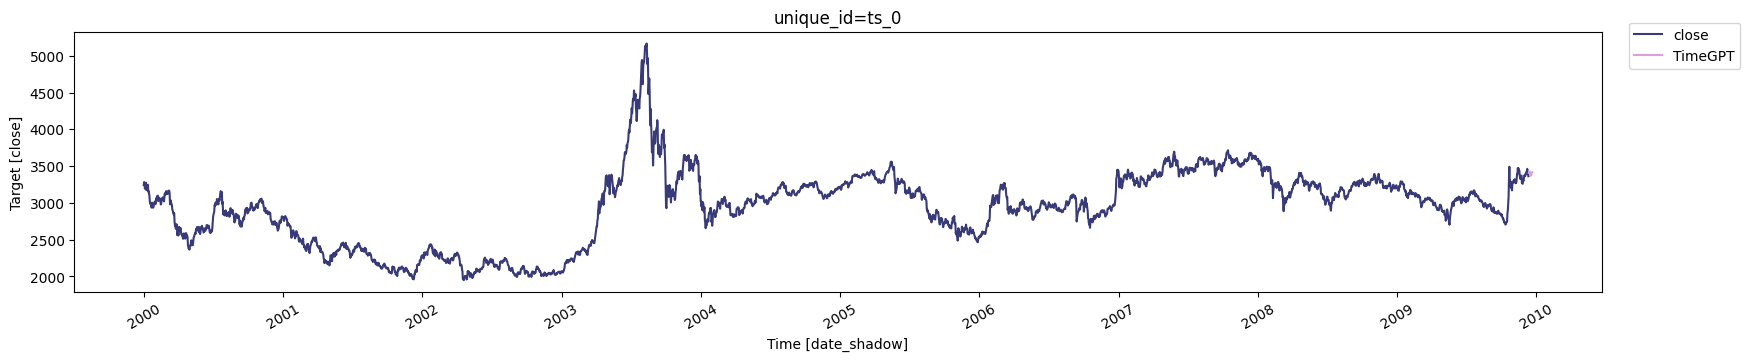

In [29]:
nixtla_client.plot(df_market, timegpt_fcst_df, time_col='date_shadow', target_col='close')
